In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [9]:
import requests

# URL of the Bengali Bible text dataset
url = "https://raw.githubusercontent.com/BibleNLP/ebible/main/corpus/ben-ben2017.txt"

# Download the dataset
response = requests.get(url)
bengali_text = response.text

# Save the dataset to a local file
with open("bengali_text.txt", "w", encoding="utf-8") as file:
    file.write(bengali_text)


In [ ]:
import sentencepiece as spm

# Train the SentencePiece model
spm.SentencePieceTrainer.train(input='bengali_text.txt', model_prefix='bengali_sp', vocab_size=32000, model_type='bpe')


In [15]:
from transformers import AutoTokenizer, GPT2Tokenizer
import sentencepiece as spm

# Example sentences in English and Bengali
sentence_english = "The quick brown fox jumps over the lazy dog."
sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।"

# GPT-2 Tokenization
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt2_tokens_english = gpt2_tokenizer.tokenize(sentence_english)
gpt2_tokens_bengali = gpt2_tokenizer.tokenize(sentence_bengali)

print("GPT-2 Tokenization:")
print("English:", gpt2_tokens_english)
print("Bengali:", gpt2_tokens_bengali)

# Meta-LLaMA-3.1-8B Tokenization using AutoTokenizer
llama_tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B")
llama_tokens_english = llama_tokenizer.tokenize(sentence_english)
llama_tokens_bengali = llama_tokenizer.tokenize(sentence_bengali)

print("\nMeta-LLaMA-3.1-8B Tokenization:")
print("English:", llama_tokens_english)
print("Bengali:", llama_tokens_bengali)

# SentencePiece BPE Tokenization
sp = spm.SentencePieceProcessor(model_file='bengali_sp.model')
sp_tokens_english = sp.encode(sentence_english, out_type=str)
sp_tokens_bengali = sp.encode(sentence_bengali, out_type=str)

print("\nSentencePiece BPE Tokenization:")
print("English:", sp_tokens_english)
print("Bengali:", sp_tokens_bengali)

# sentences 
# sentence_english = "The quick brown fox jumps over the lazy dog."
# sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে


GPT-2 Tokenization:
English: ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
Bengali: ['à¦', 'ļ', 'à¦', '¾', 'à¦', 'ģ', 'à¦', '¦', 'à¦', '¨', 'à', '§', 'Ģ', 'Ġ', 'à¦', '°', 'à¦', '¾', 'à¦', '¤', 'à', '§', 'ĩ', 'Ġ', 'à¦', '¨', 'à¦', '¦', 'à', '§', 'Ģ', 'à¦', '°', 'Ġ', 'à¦', '§', 'à¦', '¾', 'à¦', '°', 'à', '§', 'ĩ', 'Ġ', 'à¦', '¹', 'à¦', '¾', 'à¦', 'ģ', 'à¦', 'Ł', 'à¦', '¤', 'à', '§', 'ĩ', 'Ġ', 'à¦', 'Ń', 'à¦', '¾', 'à¦', '²', 'à', '§', 'ĭ', 'Ġ', 'à¦', '²', 'à¦', '¾', 'à¦', 'Ĺ', 'à', '§', 'ĩ', 'à¥', '¤']

Meta-LLaMA-3.1-8B Tokenization:
English: ['The', 'Ġquick', 'Ġbrown', 'Ġfox', 'Ġjumps', 'Ġover', 'Ġthe', 'Ġlazy', 'Ġdog', '.']
Bengali: ['à¦', 'ļ', 'à¦¾à¦', 'ģ', 'à¦', '¦', 'à¦¨', 'à§', 'Ģ', 'Ġà¦', '°', 'à¦¾à¦', '¤', 'à§ĩ', 'Ġà¦', '¨', 'à¦', '¦', 'à§', 'Ģ', 'à¦°', 'Ġà¦', '§', 'à¦¾à¦', '°', 'à§ĩ', 'Ġà¦', '¹', 'à¦¾à¦', 'ģ', 'à¦', 'Ł', 'à¦', '¤', 'à§ĩ', 'Ġà¦', 'Ń', 'à¦¾à¦', '²', 'à§', 'ĭ', 'Ġà¦', '²', 'à¦¾à¦', 'Ĺ', 'à§ĩ', 'à¥¤']

SentencePiece BPE Tokeni

In [16]:
import tiktoken

# Initialize the tiktoken encoder
tiktoken_gpt2 = tiktoken.get_encoding("gpt2")

# Example sentences in English and Bengali
sentence_english = "The quick brown fox jumps over the lazy dog."
sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।"

# Tokenize the English sentence using tiktoken
tiktoken_tokens_english = tiktoken_gpt2.encode(sentence_english)
print("Tiktoken Tokenization (English):")
print("Tokens:", tiktoken_tokens_english)
print("Decoded:", tiktoken_gpt2.decode(tiktoken_tokens_english))

# Tokenize the Bengali sentence using tiktoken
tiktoken_tokens_bengali = tiktoken_gpt2.encode(sentence_bengali)
print("\nTiktoken Tokenization (Bengali):")
print("Tokens:", tiktoken_tokens_bengali)
print("Decoded:", tiktoken_gpt2.decode(tiktoken_tokens_bengali))


Tiktoken Tokenization (English):
Tokens: [464, 2068, 7586, 21831, 18045, 625, 262, 16931, 3290, 13]
Decoded: The quick brown fox jumps over the lazy dog.

Tiktoken Tokenization (Bengali):
Tokens: [48071, 248, 48071, 122, 48071, 223, 48071, 99, 48071, 101, 156, 100, 222, 220, 48071, 108, 48071, 122, 48071, 97, 156, 100, 229, 220, 48071, 101, 48071, 99, 156, 100, 222, 48071, 108, 220, 48071, 100, 48071, 122, 48071, 108, 156, 100, 229, 220, 48071, 117, 48071, 122, 48071, 223, 48071, 253, 48071, 97, 156, 100, 229, 220, 48071, 255, 48071, 122, 48071, 110, 156, 100, 233, 220, 48071, 110, 48071, 122, 48071, 245, 156, 100, 229, 24231, 97]
Decoded: চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।


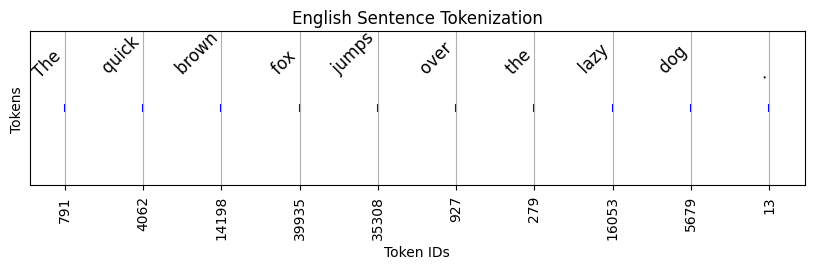

/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.

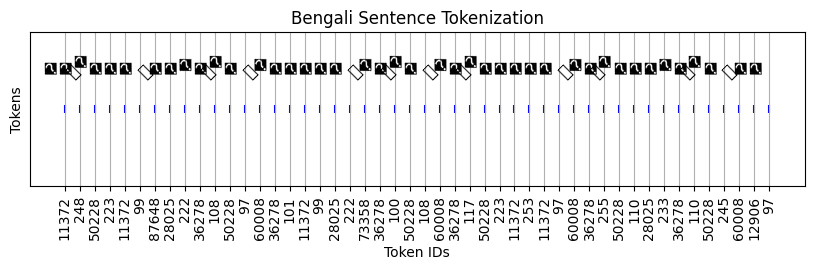

In [18]:
import tiktoken
import matplotlib.pyplot as plt

# Initialize the tiktoken encoder
enc = tiktoken.get_encoding("cl100k_base")

# Example sentences in English and Bengali
sentence_english = "The quick brown fox jumps over the lazy dog."
sentence_bengali = "চাঁদনী রাতে নদীর ধারে হাঁটতে ভালো লাগে।"

# Tokenize the English sentence
tokens_english = enc.encode(sentence_english)
tokens_english_str = [enc.decode([token]) for token in tokens_english]

# Tokenize the Bengali sentence
tokens_bengali = enc.encode(sentence_bengali)
tokens_bengali_str = [enc.decode([token]) for token in tokens_bengali]

# Visualization function
def visualize_tokenization(original_sentence, tokens, tokens_str, title):
    plt.figure(figsize=(10, 2))
    plt.title(title)
    plt.scatter(range(len(tokens)), [1] * len(tokens), marker='|', color='blue')
    for i, token_str in enumerate(tokens_str):
        plt.text(i, 1.02, token_str, rotation=45, ha="right", va="bottom", fontsize=12)
    plt.yticks([])
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.xlabel("Token IDs")
    plt.ylabel("Tokens")
    plt.grid(True)
    plt.show()

# Visualize English sentence tokenization
visualize_tokenization(sentence_english, tokens_english, tokens_english_str, "English Sentence Tokenization")

# Visualize Bengali sentence tokenization
visualize_tokenization(sentence_bengali, tokens_bengali, tokens_bengali_str, "Bengali Sentence Tokenization")


In [19]:
#training tokenizer from author's code 

In [26]:
import requests

# URL of the Bengali Bible text dataset
url = "https://raw.githubusercontent.com/BibleNLP/ebible/main/corpus/ben-ben2017.txt"

# Download the dataset
response = requests.get(url)
bengali_text = response.text

# Save the dataset to a local file
with open("bengali_text.txt", "w", encoding="utf-8") as file:
    file.write(bengali_text)


In [34]:
import os
import sentencepiece as spm
from transformers import AutoTokenizer

def parse_arguments():
    return {
        "input_lang": "bn",
        "input_file": "bengali_data.txt",
        "output_path": "model/llama_tokenizer_bn"
    }

def train_sentencepiece(input_file, output_path):
    spm.SentencePieceTrainer.train(
        input=input_file,
        model_prefix=output_path,
        vocab_size=32000,
        character_coverage=1.0,  # Cover all characters in Bengali
        model_type='bpe',  # Byte-Pair Encoding
        split_digits=True,
        allow_whitespace_only_pieces=True,
        num_threads=24,
        max_sentence_length=300000,
        train_extremely_large_corpus=True,
        byte_fallback=True,
        accept_language='bn',
        unk_piece='<unk>',
        bos_piece='<s>',
        eos_piece='</s>',
        pad_piece='<pad>',
        unk_id=0,
        bos_id=1,
        eos_id=2,
        pad_id=3,
        user_defined_symbols="▁▁,▁▁▁,▁▁▁▁,▁▁▁▁▁▁▁▁,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,--,----,-----,--------,----------------,++,/**,***,****,******,********,**/,##,###,,,,,,▁—,▁“,“,”,’,—"
    )

def convert_to_hf_format(output_path):
    tokenizer = AutoTokenizer.from_pretrained(output_path+'.model')
    tokenizer.save_pretrained(output_path+'/')

if __name__ == "__main__":
    args = parse_arguments()

    input_file = args['input_file']
    output_path = args['output_path']
    
    # If model files do not exist, train the tokenizer
    if not os.path.exists(output_path+".model") or not os.path.exists(output_path+".vocab"):
        train_sentencepiece(input_file, output_path)
        convert_to_hf_format(output_path)
    else:
        print(f"Skipping training because the files {output_path}.model and/or {output_path}.vocab already exist.")


RuntimeError: Internal:  is already defined. duplicated symbols are not allowed.

In [35]:
import os
import sentencepiece as spm
from transformers import AutoTokenizer

def parse_arguments():
    return {
        "input_lang": "bn",
        "input_file": "bengali_data.txt",
        "output_path": "model/llama_tokenizer_bn"
    }

def train_sentencepiece(input_file, output_path):
    spm.SentencePieceTrainer.train(
        input=input_file,
        model_prefix=output_path,
        vocab_size=32000,
        character_coverage=1.0,  # Cover all characters in Bengali
        model_type='bpe',  # Byte-Pair Encoding
        split_digits=True,
        allow_whitespace_only_pieces=True,
        num_threads=24,
        max_sentence_length=300000,
        train_extremely_large_corpus=True,
        byte_fallback=True,
        accept_language='bn',
        unk_piece='<unk>',
        bos_piece='<s>',
        eos_piece='</s>',
        pad_piece='<pad>',
        unk_id=0,
        bos_id=1,
        eos_id=2,
        pad_id=3,
        user_defined_symbols="▁▁,▁▁▁,▁▁▁▁,▁▁▁▁▁▁▁▁,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,--,----,-----,--------,----------------,++,/**,***,****,******,********,**/,##,###,▁—,▁“,“,”,’,—"
    )

def convert_to_hf_format(output_path):
    tokenizer = AutoTokenizer.from_pretrained(output_path+'.model')
    tokenizer.save_pretrained(output_path+'/')

if __name__ == "__main__":
    args = parse_arguments()

    input_file = args['input_file']
    output_path = args['output_path']
    
    # If model files do not exist, train the tokenizer
    if not os.path.exists(output_path+".model") or not os.path.exists(output_path+".vocab"):
        train_sentencepiece(input_file, output_path)
        convert_to_hf_format(output_path)
    else:
        print(f"Skipping training because the files {output_path}.model and/or {output_path}.vocab already exist.")


OSError: model/llama_tokenizer_bn.model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [36]:
from transformers import LlamaTokenizerFast


In [37]:
def convert_to_hf_format(output_path):
    # Load the SentencePiece model file into LlamaTokenizerFast
    tokenizer = LlamaTokenizerFast(vocab_file=output_path + '.model')
    
    # Save it to the Hugging Face format in the specified output directory
    tokenizer.save_pretrained(output_path)


In [38]:
convert_to_hf_format("model/llama_tokenizer_bn")

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


In [39]:
from transformers import LlamaTokenizerFast

tokenizer = LlamaTokenizerFast.from_pretrained("model/llama_tokenizer_bn")


In [40]:
text = "আমি বাংলায় গান গাই"
encoded = tokenizer.encode(text)
decoded = tokenizer.decode(encoded)

print("Original Text:", text)
print("Encoded:", encoded)
print("Decoded:", decoded)


Original Text: আমি বাংলায় গান গাই
Encoded: [1, 950, 402, 31946, 1766, 1592, 5989]
Decoded: <s>আমি বাংলায় গান গাই


In [42]:
tokens = tokenizer.tokenize(text)
print("Tokens:", tokens)


Tokens: ['আমি', '▁বা', 'ং', 'লায়', '▁গান', '▁গাই']


In [2]:
# Paths to the downloaded text files
english_file_path = "eng-enggnv.txt"
bengali_file_path = "ben-ben2017.txt"
output_file_path = "merged_bengali_english.txt"

# Open the files and the output file
with open(english_file_path, 'r', encoding='utf-8') as eng_file, \
     open(bengali_file_path, 'r', encoding='utf-8') as ben_file, \
     open(output_file_path, 'w', encoding='utf-8') as out_file:

    # Read lines from both files
    eng_lines = eng_file.readlines()
    ben_lines = ben_file.readlines()

    # Determine the minimum length to avoid IndexError
    min_len = min(len(eng_lines), len(ben_lines))

    # Write lines alternately to the output file
    for i in range(min_len):
        out_file.write(eng_lines[i].strip() + "\n")
        out_file.write(ben_lines[i].strip() + "\n")

    # If one file is longer, add the remaining lines from that file
    if len(eng_lines) > min_len:
        out_file.writelines(eng_lines[min_len:])
    elif len(ben_lines) > min_len:
        out_file.writelines(ben_lines[min_len:])


In [44]:
#training the english-bengali tokenizer 

In [4]:
import os
import sentencepiece as spm
from transformers import LlamaTokenizerFast

def parse_arguments():
    return {
        "input_lang": "bn,en",  # Specify both Bengali and English
        "input_file": "merged_bengali_english.txt",  # Your combined text file
        "output_path": "tokenizer/llama_tokenizer_bn_en"  # Output path for the trained tokenizer
    }

def train_sentencepiece(input_file, output_path):
    spm.SentencePieceTrainer.train(
        input=input_file,
        model_prefix=output_path,
        vocab_size=32000,
        character_coverage=1.0,  # Cover all characters in both Bengali and English
        model_type='bpe',  # Byte-Pair Encoding
        split_digits=True,
        allow_whitespace_only_pieces=True,
        num_threads=24,
        max_sentence_length=300000,
        train_extremely_large_corpus=True,
        byte_fallback=True,
        accept_language='en,bn',  # Accept both English and Bengali
        unk_piece='<unk>',
        bos_piece='<s>',
        eos_piece='</s>',
        pad_piece='<pad>',
        unk_id=0,
        bos_id=1,
        eos_id=2,
        pad_id=3,
        user_defined_symbols="▁▁,▁▁▁,▁▁▁▁,▁▁▁▁▁▁▁▁,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁,--,----,-----,--------,----------------,++,/**,***,****,******,********,**/,##,###,▁—,▁“,“,”,’,—"
    )

def convert_to_hf_format(output_path):
    # Load the SentencePiece model file into LlamaTokenizerFast
    tokenizer = LlamaTokenizerFast(vocab_file=output_path + '.model')
    
    # Save it to the Hugging Face format in the specified output directory
    tokenizer.save_pretrained(output_path)

if __name__ == "__main__":
    args = parse_arguments()

    input_file = args['input_file']
    output_path = args['output_path']
    
    # If model files do not exist, train the tokenizer
    if not os.path.exists(output_path + ".model") or not os.path.exists(output_path + ".vocab"):
        train_sentencepiece(input_file, output_path)
        convert_to_hf_format(output_path)
    else:
        print(f"Skipping training because the files {output_path}.model and/or {output_path}.vocab already exist.")


You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


In [5]:
# Example texts
english_text = "In the beginning God created the heavens and the earth."
bengali_text = "আদিতে ঈশ্বর আকাশমণ্ডল ও পৃথিবীর সৃষ্টি করলেন।"

# Load the tokenizer
tokenizer = LlamaTokenizerFast.from_pretrained("tokenizer/llama_tokenizer_bn_en")

# Tokenization for English
english_tokens = tokenizer.tokenize(english_text)
english_encoded = tokenizer.encode(english_text)
decoded_english = tokenizer.decode(english_encoded)

# Tokenization for Bengali
bengali_tokens = tokenizer.tokenize(bengali_text)
bengali_encoded = tokenizer.encode(bengali_text)
decoded_bengali = tokenizer.decode(bengali_encoded)

# Print the results
print("Original English Text:", english_text)
print("English Tokens:", english_tokens)
print("English Encoded:", english_encoded)
print("Decoded English:", decoded_english)

print("\nOriginal Bengali Text:", bengali_text)
print("Bengali Tokens:", bengali_tokens)
print("Bengali Encoded:", bengali_encoded)
print("Decoded Bengali:", decoded_bengali)


Original English Text: In the beginning God created the heavens and the earth.
English Tokens: ['I', 'n', '▁the', '▁beginning', '▁God', '▁created', '▁the', '▁he', 'av', 'ens', '▁and', '▁the', '▁earth', '.']
English Encoded: [1, 31921, 31873, 287, 3906, 523, 6878, 287, 354, 5795, 5482, 303, 287, 1052, 31913]
Decoded English: <s>In the beginning God created the heavens and the earth.

Original Bengali Text: আদিতে ঈশ্বর আকাশমণ্ডল ও পৃথিবীর সৃষ্টি করলেন।
Bengali Tokens: ['আ', 'দি', 'তে', '▁ঈশ্বর', '▁আকাশমণ্ডল', '▁ও', '▁পৃথিবীর', '▁সৃষ্টি', '▁করলেন', '।']
Bengali Encoded: [1, 31902, 583, 361, 530, 7166, 369, 1925, 2885, 709, 31910]
Decoded Bengali: <s>আদিতে ঈশ্বর আকাশমণ্ডল ও পৃথিবীর সৃষ্টি করলেন।


In [54]:
#creating aligned corpus 

In [6]:
from pathlib import Path
from transformers import LlamaTokenizerFast
import os
import regex as re
from tqdm import tqdm

# Define paths and settings
home_path = Path("tokenizer")
source_language = "en"
target_language = "bn"
source_tokenizer = "tokenizer/llama_tokenizer_bn_en"  # Path to your English tokenizer
target_tokenizer = "tokenizer/llama_tokenizer_bn_en"  # Path to your Bengali tokenizer

# Load the tokenizers
old_tokenizer = LlamaTokenizerFast.from_pretrained(source_tokenizer)
new_tokenizer = LlamaTokenizerFast.from_pretrained(target_tokenizer)

# Define prefixes for tokenizers (for handling special cases)
OLD_TOKENIZER_1ST_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
NEW_TOKENIZER_1ST_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
OLD_TOKENIZER_2ND_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')
NEW_TOKENIZER_2ND_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')

# Define the output path
out_path = f'{home_path}/aligned_corpus.moses'

# Open the parallel corpus and the output file
with open("cleaned_parallel_corpus.txt", 'r', encoding='utf-8') as infile, open(out_path, 'w', encoding='utf-8') as outfile:
    for line in tqdm(infile):
        if '|||' in line:
            line_source, line_target = line.strip().split(' ||| ')
            
            # Tokenize and merge tokens for both languages
            line1 = re.sub(
                r'(?!'
                + OLD_TOKENIZER_1ST_PREFIX
                + r')(\p{L})[ ](?!'
                + OLD_TOKENIZER_1ST_PREFIX
                + r')(?='
                + OLD_TOKENIZER_2ND_PREFIX
                + r'\p{L})',
                r'\1—',
                ' '.join(old_tokenizer.tokenize(line_source.strip())),
            )
            line2 = re.sub(
                r'(?!'
                + NEW_TOKENIZER_1ST_PREFIX
                + r')(\p{L})[ ](?!'
                + NEW_TOKENIZER_1ST_PREFIX
                + r')(?='
                + NEW_TOKENIZER_2ND_PREFIX
                + r'\p{L})',
                r'\1—',
                ' '.join(new_tokenizer.tokenize(line_target.strip())),
            )

            # Write the tokenized and aligned lines to the output file
            outfile.write(line1.strip() + ' ||| ' + line2.strip() + '\n')

print(f"Aligned corpus created at: {out_path}")


31082it [00:14, 2113.08it/s]

Aligned corpus created at: tokenizer/aligned_corpus.moses


In [8]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


axolotl			     data			 new_attempt.ipynb
axolotl-update		     eng-enggnv.txt		 tokenizer
ben-ben2017.txt		     fast_align
cleaned_parallel_corpus.txt  merged_bengali_english.txt


In [9]:
%cd fast_align
!mkdir build
%cd build
!cmake ..
!make

/root/miniconda3/envs/py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/workspace/fast_align
/workspace/fast_align/build


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


CMake Warning (dev) at CMakeLists.txt:1 (project):
  cmake_minimum_required() should be called prior to this top-level project()
  call.  Please see the cmake-commands(7) manual for usage documentation of
  both commands.
This warning is for project developers.  Use -Wno-dev to suppress it.

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Deprecation Warning at CMakeLists.txt:2 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or u

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[ 16%] Building CXX object CMakeFiles/fast_align.dir/src/fast_align.cc.o
[ 33%] Building CXX object CMakeFiles/fast_align.dir/src/ttables.cc.o
[ 50%] Linking CXX executable fast_align
[ 50%] Built target fast_align
[ 66%] Building CXX object CMakeFiles/atools.dir/src/alignment_io.cc.o
[ 83%] Building CXX object CMakeFiles/atools.dir/src/atools.cc.o
[100%] Linking CXX executable atools
[100%] Built target atools


In [57]:
#align corpus 

In [16]:
import os

def align_corpus(corpus_path, fast_align_path, output_dir):
    output_path = os.path.join(output_dir, os.path.basename(corpus_path).replace(".moses", ".fast_align.tsv"))

    if os.path.exists(output_path):
        print(f"Corpus already aligned: {output_path}")
    else:
        # Run FastAlign
        command = f"{fast_align_path} -i {corpus_path} -d -o -v > {output_path}"
        os.system(command)
    
    return output_path

# Define paths
corpus_path = "tokenizer/aligned_corpus.moses"  # Path to your Moses-style file
fast_align_path = "fast_align/build/fast_align"       # Path to the FastAlign executable
output_dir = "tokenizer"             # Directory to save the aligned corpus

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Run the alignment
aligned_corpus_path = align_corpus(corpus_path, fast_align_path, output_dir)
print(f"Aligned tokens saved at: {aligned_corpus_path}")


ARG=i
ARG=d
ARG=o
ARG=v
INITIAL PASS 
...............................
expected target length = source length * 0.882725
ITERATION 1
...............................
  log_e likelihood: -1.59083e+07
  log_2 likelihood: -2.29509e+07
     cross entropy: 29.8974
        perplexity: 1e+09
      posterior p0: 0.08
 posterior al-feat: -0.166292
       size counts: 2055
ITERATION 2
...............................
  log_e likelihood: -5.3339e+06
  log_2 likelihood: -7.6952e+06
     cross entropy: 10.0243
        perplexity: 1041.39
      posterior p0: 0.0836075
 posterior al-feat: -0.14228
       size counts: 2055
  1  model al-feat: -0.201778 (tension=4)
  2  model al-feat: -0.17079 (tension=5.18997)
  3  model al-feat: -0.15864 (tension=5.76018)
  4  model al-feat: -0.152329 (tension=6.08739)
  5  model al-feat: -0.14867 (tension=6.28839)
  6  model al-feat: -0.146424 (tension=6.4162)
  7  model al-feat: -0.145 (tension=6.49908)
  8  model al-feat: -0.144079 (tension=6.55349)
     final tensio

Aligned tokens saved at: tokenizer/aligned_corpus.fast_align.tsv


In [18]:
import math

def load_moses_file(moses_file):
    with open(moses_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

def load_fastalign_file(fastalign_file):
    with open(fastalign_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines


In [19]:
def convert_fastalign_to_4col(moses_lines, fastalign_lines, output_file):
    with open(output_file, 'w', encoding='utf-8') as f_out:
        for moses_line, fastalign_line in zip(moses_lines, fastalign_lines):
            source_sentence, target_sentence = moses_line.strip().split(' ||| ')
            source_tokens = source_sentence.split()
            target_tokens = target_sentence.split()
            alignments = fastalign_line.strip().split()

            for align in alignments:
                src_index, tgt_index = map(int, align.split('-'))
                
                # Get the corresponding tokens
                source_token = source_tokens[src_index]
                target_token = target_tokens[tgt_index]

                # For simplicity, we assume a uniform log_prob and count
                # In a more sophisticated implementation, these could be computed based on some heuristic or model
                log_prob = -math.log(len(source_tokens) * len(target_tokens))  # Simplistic log_prob estimation
                count = 1  # Assuming count as 1 for simplicity

                # Write to the output file
                f_out.write(f'{source_token}\t{target_token}\t{log_prob}\t{count}\n')



In [20]:
# Paths to your files
moses_file = "aligned_corpus.moses"
fastalign_file = "tokenizer/aligned_corpus.fast_align.tsv"
output_file = "converted_aligned_corpus.tsv"

# Load the Moses and FastAlign data
moses_lines = load_moses_file(moses_file)
fastalign_lines = load_fastalign_file(fastalign_file)

# Convert to the four-column format
convert_fastalign_to_4col(moses_lines, fastalign_lines, output_file)

print(f"Conversion complete. Four-column file saved to: {output_file}")


Conversion complete. Four-column file saved to: converted_aligned_corpus.tsv


In [25]:
import transformers
import os
import numpy as np
import math
from collections import defaultdict
from tqdm import tqdm

def add_token_pair(count, new_token, old_token, tokenized_possible_translations):
    tokenized_possible_translations[new_token][old_token] += count

def add_word_pair(count, new_word, old_word, all_to_all_mapping, tokenized_possible_translations):
    old_word_tokenized = old_word.split('—')
    new_word_tokenized = new_word.split('—')

    if all_to_all_mapping:
        count_dilution = len(old_word_tokenized)
        old_word_tokenized = np.tile(old_word_tokenized, len(new_word_tokenized))
        new_word_tokenized = np.repeat(new_word_tokenized, count_dilution)
    elif len(old_word_tokenized) != len(new_word_tokenized):
        gcd = math.gcd(len(old_word_tokenized), len(new_word_tokenized))
        count_dilution = len(old_word_tokenized) // gcd
        old_word_tokenized = np.repeat(old_word_tokenized, len(new_word_tokenized) // gcd)
        new_word_tokenized = np.repeat(new_word_tokenized, count_dilution)
    else:
        gcd = 1
        count_dilution = 1

    for token_old, token_new in zip(old_word_tokenized, new_word_tokenized):
        tokenized_possible_translations[token_new][token_old] += max(1, count // count_dilution)

# Load your tokenizers
source_tokenizer = "tokenizer/llama_tokenizer_bn_en"
target_tokenizer = "tokenizer/llama_tokenizer_bn_en"

old_tokenizer = transformers.AutoTokenizer.from_pretrained(source_tokenizer)
new_tokenizer = transformers.AutoTokenizer.from_pretrained(target_tokenizer)

old_tokenizer_vocab = set(old_tokenizer.vocab.keys())
new_tokenizer_vocab = set(new_tokenizer.vocab.keys())

tokenized_possible_translations = defaultdict(lambda: defaultdict(int))
untokenized_possible_translations = defaultdict(lambda: defaultdict(int))

# Set prefixes for special handling
OLD_TOKENIZER_1ST_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
NEW_TOKENIZER_1ST_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode(" a", add_special_tokens=False)[0]
).rstrip("a")
OLD_TOKENIZER_2ND_PREFIX = old_tokenizer.convert_ids_to_tokens(
    old_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')
NEW_TOKENIZER_2ND_PREFIX = new_tokenizer.convert_ids_to_tokens(
    new_tokenizer.encode("aaaaaaaaaaaaaaaaaaaaaa", add_special_tokens=False)[1]
).rstrip('a')

# Load your mapped tokens file
mapped_tokens_file = "converted_aligned_corpus.tsv"
MIN_COUNT_REQUIRED_FOR_CONSIDERATION = 1

total_alignments = sum(1 for _ in open(mapped_tokens_file))

with open(mapped_tokens_file) as f:
    for line in tqdm(f, total=total_alignments):
        line = line.rstrip('\n')
        if line == '':
            continue
        
        parts = line.split('\t')
        if len(parts) != 4:
            continue
        old_word, new_word, log_prob, count = parts

        if old_word == '<eps>' or new_word == '<eps>':
            continue
        
        count = int(float(count))
        if count < MIN_COUNT_REQUIRED_FOR_CONSIDERATION:
            continue
        
        if (new_word in new_tokenizer_vocab) and (old_word in old_tokenizer_vocab):
            add_token_pair(count, new_word, old_word, tokenized_possible_translations)
        else:
            half_count = max(1, count // 2)
            add_word_pair(half_count, new_word, old_word, all_to_all_mapping=True, tokenized_possible_translations=tokenized_possible_translations)
            add_word_pair(half_count, new_word, old_word, all_to_all_mapping=False, tokenized_possible_translations=tokenized_possible_translations)
        
        untokenized_possible_translations[new_word][old_word] += count

def or_old_unk_token(token, fallback_token=None):
    if (token is not None) and (token in old_tokenizer_vocab):
        return token
    if (fallback_token is not None) and (fallback_token in old_tokenizer_vocab):
        return fallback_token
    return old_tokenizer.unk_token

very_large_number = 1_000_000_000
if new_tokenizer.pad_token is not None:
    add_token_pair(very_large_number, new_tokenizer.pad_token, or_old_unk_token(old_tokenizer.pad_token, None), tokenized_possible_translations)
if new_tokenizer.unk_token is not None:
    add_token_pair(very_large_number, new_tokenizer.unk_token, or_old_unk_token(old_tokenizer.unk_token, None), tokenized_possible_translations)
if new_tokenizer.bos_token is not None:
    add_token_pair(very_large_number, new_tokenizer.bos_token, or_old_unk_token(old_tokenizer.bos_token, old_tokenizer.cls_token), tokenized_possible_translations)
if new_tokenizer.eos_token is not None:
    add_token_pair(very_large_number, new_tokenizer.eos_token, or_old_unk_token(old_tokenizer.eos_token, old_tokenizer.sep_token), tokenized_possible_translations)
if new_tokenizer.cls_token is not None:
    add_token_pair(very_large_number, new_tokenizer.cls_token, or_old_unk_token(old_tokenizer.cls_token, old_tokenizer.bos_token), tokenized_possible_translations)
if new_tokenizer.sep_token is not None:
    add_token_pair(very_large_number, new_tokenizer.sep_token, or_old_unk_token(old_tokenizer.sep_token, old_tokenizer.eos_token), tokenized_possible_translations)
if new_tokenizer.mask_token is not None:
    add_token_pair(very_large_number, new_tokenizer.mask_token, or_old_unk_token(old_tokenizer.mask_token, old_tokenizer.pad_token), tokenized_possible_translations)

print(f'Number of tokens with a translation: {len(tokenized_possible_translations)}')
print(f'Number of new tokens: {len(new_tokenizer)}')
print(f'Percentage of tokens with a translation: {int(len(tokenized_possible_translations) / len(new_tokenizer) * 1000)/10}%')


100%|██████████| 736374/736374 [00:13<00:00, 54365.31it/s]

Number of tokens with a translation: 16965
Number of new tokens: 32000
Percentage of tokens with a translation: 53.0%


In [32]:
def smooth_mapping(target_tokenizer, tokenized_possible_translations, print_debug=False):
    """
    Tokens (e.g. long words) that don't get mapped from the parallel corpus are mapped using split tokens. 
    All tokens inside that token and don't overlap, are used for that mapping. 
    """
    new_tokenizer = transformers.AutoTokenizer.from_pretrained(target_tokenizer)

    # Print the first 100 tokens that have no translation
    tmp_count = 0
    for i, token in enumerate(tqdm(new_tokenizer.get_vocab())):
        if token not in tokenized_possible_translations:
            tmp_count += 1
            if tmp_count > 100:
                break
            
            # Provide a list of tokens which start with the same characters
            similar_tokens = [token2 for token2 in new_tokenizer.get_vocab() 
                              if isinstance(token2, str) and isinstance(token, str) and 
                              token2.startswith(token) and (token2 in tokenized_possible_translations)]
            
            # Find the tokens which are the middle of this token
            middle_subset_tokens = [token2 for token2 in tokenized_possible_translations 
                                    if isinstance(token2, str) and isinstance(token, str) and 
                                    (token2 in token) and (token2 in tokenized_possible_translations)]
            
            if middle_subset_tokens:
                middle_subset_tokens.sort(key=lambda x: len(x), reverse=True)
            
                # Remove the tokens which are included in another previous token of the list
                middle_subset_tokens = [token2 for i, token2 in enumerate(middle_subset_tokens) 
                                        if (i == 0) or not any([token2 in token3 for token3 in middle_subset_tokens[0:i]])]
            
                # Sort the middle tokens by position in the token
                middle_subset_tokens.sort(key=lambda x: token.index(x))
            
            # Print debug information if requested
            if print_debug:
                print(token, similar_tokens, middle_subset_tokens)
            
            # Add the token to the updated dictionary
            if len(similar_tokens) == 0 and len(middle_subset_tokens) == 0:
                continue
            tokenized_possible_translations[token] = defaultdict(int)
            for token2 in similar_tokens + middle_subset_tokens:
                # Add all their translation to the dictionary, normalizing to a total count of 1000 for each token2 (2000 if the token starts with a space)
                count_for_token2 = sum(tokenized_possible_translations[token2].values())
                if count_for_token2 > 0:
                    for translation_of_token2 in tokenized_possible_translations[token2]:
                        weight = 2000 if isinstance(translation_of_token2, str) and translation_of_token2.startswith('▁') else 1000
                        tokenized_possible_translations[token][translation_of_token2] += max(1, (weight * tokenized_possible_translations[token2][translation_of_token2]) // count_for_token2)

    def get_coefficients_for_token(new_token):
        # Check for unmapped tokens
        if new_token not in tokenized_possible_translations:
            return [(new_tokenizer.unk_token, 1.0)]
        
        # Get the possible translations for this token
        possible_translations = tokenized_possible_translations[new_token]
        
        # Get the total count of all translations
        total_count = sum(possible_translations.values())
        
        # Check for unmapped tokens by count
        if total_count <= 0:
            return [(new_tokenizer.unk_token, 1.0)]
        
        # Compute the probability of each translation
        probabilities = {old_token: count / total_count for old_token, count in possible_translations.items()}
        
        # Sort the translations by probability
        probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
        
        # Return the probabilities
        return probabilities

    # Create the final list
    final_list = []
    for token_i in range(len(new_tokenizer.vocab)):
        token = new_tokenizer.convert_ids_to_tokens(token_i)
        coefficients = get_coefficients_for_token(token)
        final_list.append((token, coefficients))

    return final_list

# Call the smooth_mapping function
smoothed_mapping = smooth_mapping(target_tokenizer, tokenized_possible_translations, print_debug=True)


print("All entries of smoothed_mapping:")
for entry in smoothed_mapping:
    print(entry)

  0%|          | 7/32000 [00:00<16:42, 31.92it/s]

▁উদ্যান [] []
▁পঁচিশ [] []
▁বাজালেন [] []
ose [] []
▁Areli [] []
▁sleepe [] []
▁নাড়ার [] []
ak [] []
▁দানীয় [] []
alon [] []


  0%|          | 15/32000 [00:00<16:12, 32.87it/s]

▁balances [] []
▁লোকদের [] []
▁cruel [] []
<0x5E> [] []
idence [] []
্লিশ [] []
▁busines [] []
কুতি [] []


  0%|          | 23/32000 [00:00<16:10, 32.95it/s]

▁Ocran [] []
age [] []
onia [] []
▁শক্তিমান [] []
▁পরামর্শদাত [] []
▁wandring [] []
▁কফরনাহূম [] []


  0%|          | 31/32000 [00:00<16:13, 32.83it/s]

▁তাঁদেরও [] []
▁large [] []
▁accompanied [] []
alaam [] []
চে [] []
ters [] []
▁নিরাপত্তায় [] []
শার [] []


  0%|          | 39/32000 [00:01<16:21, 32.55it/s]

চা [] []
▁chur [] []
▁ক্ষু [] []
▁shoulde [] []
▁পূজ [] []
▁গদল [] []
▁ঢাক [] []
▁flames [] []
▁শ্বেত [] []


  0%|          | 47/32000 [00:01<16:20, 32.58it/s]

▁yelowe [] []
d [] []
বুর [] []
▁theft [] []
▁ইষ্টায়োল [] []
▁মেষলোম [] []
▁charged [] []
▁sort [] []


  0%|          | 55/32000 [00:01<16:17, 32.69it/s]

▁displease [] []
▁Eliphelet [] []
▁বলবে [] []
alah [] []
সু [] []
▁beg [] []
▁আটশো [] []
▁Bisho [] []


  0%|          | 63/32000 [00:01<16:25, 32.40it/s]

bey [] []
▁আছো [] []
জ্ঞান [] []
▁করুন [] []
▁পরিত্র [] []
ৌকিক [] []
এগুলো [] []
▁parteth [] []


  0%|          | 71/32000 [00:02<16:29, 32.25it/s]

▁hired [] []
ission [] []
▁dise [] []
▁habberg [] []
▁six [] []
▁stri [] []
▁openeth [] []
<0x38> [] []


  0%|          | 79/32000 [00:02<16:26, 32.35it/s]

র্কি [] []
▁মহললেল [] []
▁harlot [] []
▁আজ্ঞার [] []
▁উচ্চস্থান [] []
▁কর্মচার [] []
▁পুঁতে [] []
alam [] []


  0%|          | 87/32000 [00:02<16:11, 32.86it/s]

▁সামনে [] []
▁চেত [] []
aum [] []
গ্রহণ [] []
▁floodes [] []
▁রৌপ [] []
প্তি [] []
▁সত্যের [] []


  0%|          | 95/32000 [00:02<16:06, 33.00it/s]

▁আকার [] []
sons [] []
▁চারক [] []
▁discer [] []
nimrah [] []
▁গেবরে [] []
▁মতামত [] []
▁Zabulon [] []


  0%|          | 100/32000 [00:03<16:17, 32.62it/s]


▁vnclean [] []
▁কচি [] []
All entries of smoothed_mapping:
('<unk>', [('<unk>', 1.0)])
('<s>', [('<unk>', 1.0)])
('</s>', [('<unk>', 1.0)])
('<pad>', [('<unk>', 1.0)])
('▁▁', [('<unk>', 1.0)])
('▁▁▁', [('<unk>', 1.0)])
('▁▁▁▁', [('<unk>', 1.0)])
('▁▁▁▁▁▁▁▁', [('<unk>', 1.0)])
('▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁', [('<unk>', 1.0)])
('--', [('<unk>', 1.0)])
('----', [('<unk>', 1.0)])
('-----', [('<unk>', 1.0)])
('--------', [('<unk>', 1.0)])
('----------------', [('<unk>', 1.0)])
('++', [('<unk>', 1.0)])
('/**', [('<unk>', 1.0)])
('***', [('<unk>', 1.0)])
('****', [('<unk>', 1.0)])
('******', [('<unk>', 1.0)])
('********', [('<unk>', 1.0)])
('**/', [('<unk>', 1.0)])
('##', [('<unk>', 1.0)])
('###', [('<unk>', 1.0)])
('▁—', [('<unk>', 1.0)])
('▁“', [('<unk>', 1.0)])
('“', [('<unk>', 1.0)])
('”', [('<unk>', 1.0)])
('’', [('<unk>', 1.0)])
('—', [('<unk>', 1.0)])
('<0x00>', [('<unk>', 1.0)])
('<0x01>', [('<unk>', 1.0)])
('<0x02>', [('<unk>', 1.0)])
('<0x03>', [('<unk>', 1.0)])
('<0x04>', [('<unk>', 1.0)])
('

In [33]:
#remap model 

In [34]:
def remap_model(source_tokenizer: str, target_tokenizer: str, mapping: list, source_model: str) -> transformers.AutoModel:
    # Load tokenizers for the two models
    old_tokenizer = transformers.AutoTokenizer.from_pretrained(source_tokenizer)
    new_tokenizer = transformers.AutoTokenizer.from_pretrained(target_tokenizer)

    # Add an unk token if none exists
    if old_tokenizer.unk_token_id is None:
        if old_tokenizer.pad_token_id is not None:
            old_tokenizer.unk_token_id = old_tokenizer.pad_token_id
            old_tokenizer.unk_token = old_tokenizer.pad_token
        elif old_tokenizer.bos_token_id is not None:
            old_tokenizer.unk_token_id = old_tokenizer.bos_token_id
            old_tokenizer.unk_token = old_tokenizer.bos_token
        else:
            print("WARNING: The old tokenizer has neither UNK, PAD, nor BOS special tokens")
            old_tokenizer.unk_token_id = 0

    # Load the old model
    print("Loading the source model...")
    model = transformers.AutoModelForCausalLM.from_pretrained(source_model)

    # Remap the embeddings
    print("Remapping the model...")
    with torch.no_grad():
        # Get the embeddings of the old model
        old_embeddings = model.get_input_embeddings().weight.data
        old_output_embeddings = model.get_output_embeddings().weight.data
        tied_weights = model.config.tie_word_embeddings

        # Change the tokenizer of the model to the new one and reinitialize the embeddings
        model.resize_token_embeddings(1)  # Hack to make the model forget its old tokenizer
        model.resize_token_embeddings(len(new_tokenizer))  # Update to new tokenizer
        new_embeddings = model.get_input_embeddings()
        new_output_embeddings = model.get_output_embeddings()
        model.config.vocab_size = len(new_tokenizer)
        model.config.pad_token_id = new_tokenizer.pad_token_id
        model.config.bos_token_id = new_tokenizer.bos_token_id
        model.config.eos_token_id = new_tokenizer.eos_token_id
        model.config.unk_token_id = new_tokenizer.unk_token_id
        model.config.sep_token_id = new_tokenizer.sep_token_id
        model.config.cls_token_id = new_tokenizer.cls_token_id
        model.config.mask_token_id = new_tokenizer.mask_token_id
        model.config.additional_special_tokens_ids = new_tokenizer.additional_special_tokens_ids
        model.config.tokenizer_class = new_tokenizer.__class__.__name__

        # For each token in the new tokenizer, find the corresponding tokens in the old tokenizer, and average their embeddings
        for new_id in tqdm(range(len(new_tokenizer))):
            old_tokens = mapping[new_id][1]  # List of (ids, weight) in the old tokenizer

            # Sort the list such that the smallest weights come first (for numerical stability)
            old_tokens = sorted(old_tokens, key=lambda x: x[1])

            # Map tokens to their ids
            old_ids = [(old_tokenizer.convert_tokens_to_ids(old_token), weight) for old_token, weight in old_tokens]
            old_ids = [(old_id if old_id is not None else old_tokenizer.unk_token_id, weight) for old_id, weight in old_ids]

            # Use a weighted average for the embeddings
            if len(old_ids) > 1:
                new_embeddings.weight.data[new_id] = reduce(lambda a, b: a.add_(b), [old_embeddings[old_id] * weight for old_id, weight in old_ids])
                if not tied_weights:
                    new_output_embeddings.weight.data[new_id] = reduce(lambda a, b: a.add_(b), [old_output_embeddings[old_id] * weight for old_id, weight in old_ids])
            elif len(old_ids) == 1:
                new_embeddings.weight.data[new_id] = old_embeddings[old_ids[0][0]]
                if not tied_weights:
                    new_output_embeddings.weight.data[new_id] = old_output_embeddings[old_ids[0][0]]
            else:
                new_embeddings.weight.data[new_id] = old_embeddings[old_tokenizer.unk_token_id]
                if not tied_weights:
                    new_output_embeddings.weight.data[new_id] = old_output_embeddings[old_tokenizer.unk_token_id]

    return model


In [37]:
from transformers import AutoModelForCausalLM

model_name = "mistralai/Mistral-7B-v0.1"
model = AutoModelForCausalLM.from_pretrained(model_name)
model.save_pretrained("Mistral-7B-v0.1")


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

[2024-08-11 21:51:46,642] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [39]:
# Call smooth_mapping and store the result
import torch
smoothed_mapping = smooth_mapping(target_tokenizer="tokenizer/llama_tokenizer_bn_en", 
                                  tokenized_possible_translations=tokenized_possible_translations, 
                                  print_debug=True)

# Define the source model path (using Mistral-7B-v0.1)
source_model_path = "Mistral-7B-v0.1"

# Now, remap the model using the smoothed mapping
remapped_model = remap_model(source_tokenizer="tokenizer/llama_tokenizer_bn_en",
                             target_tokenizer="tokenizer/llama_tokenizer_bn_en",
                             mapping=smoothed_mapping,
                             source_model=source_model_path)

# Save the remapped model
output_model_path = "output_remapped_model"  # Define your output path
os.makedirs(output_model_path, exist_ok=True)
remapped_model.save_pretrained(output_model_path)

# Save the tokenizer as well
new_tokenizer = transformers.AutoTokenizer.from_pretrained("tokenizer/llama_tokenizer_bn_en")
new_tokenizer.save_pretrained(output_model_path)


  0%|          | 6/32000 [00:00<18:57, 28.12it/s]

▁threwe [] []
▁বেরোতীয় [] []
▁ছুঁয়েছে [] []
▁maiest [] []
▁অকেজো [] []
▁নকোদের [] []
রসজাত [] []
▁শাপের [] []


  0%|          | 12/32000 [00:00<19:26, 27.41it/s]

▁দায়ে [] []
▁মালিকের [] []
ীয়েলের [] []
pin [] []
▁Libni [] []
▁শুস্ক [] []
gre [] []


  0%|          | 20/32000 [00:00<16:47, 31.75it/s]

▁মাকিদ [] []
▁rosted [] []
▁বর্ব [] []
▁মাপে [] []
kam [] []
শৌল [] []
▁greater [] []
▁vnwares [] []


  0%|          | 28/32000 [00:00<15:42, 33.94it/s]

▁Magog [] []
▁lawes [] []
ড়ির [] []
▁Sharezer [] []
▁fragments [] []
idd [] []
▁সমর্থন [] []
▁cer [] []


  0%|          | 36/32000 [00:01<15:17, 34.83it/s]

▁Phichol [] []
▁considering [] []
▁vnderstandeth [] []
▁শোনাতে [] []
▁thousad [] []
▁বলবে [] []
▁ভাববাণীর [] []
▁মশাল [] []


  0%|          | 44/32000 [00:01<14:57, 35.60it/s]

▁Wisdome [] []
▁Beware [] []
▁handmaides [] []
স্যা [] []
▁তৃণ [] []
▁forbid [] []
▁আশের [] []
িনি [] []


  0%|          | 52/32000 [00:01<14:44, 36.13it/s]

▁থাকে৷ [] []
▁spare [] []
▁অদৃশ্য [] []
▁bearing [] []
▁সেইখানে [] []
▁wrought [] []
▁বীজব [] []
▁Absaloms [] []


  0%|          | 60/32000 [00:01<14:39, 36.30it/s]

▁চালায় [] []
ঞ [] []
▁যিরুব্বালের [] []
▁Drawe [] []
▁সূক্ষ [] []
▁তেজ [] []
▁widd [] []
চাপি [] []


  0%|          | 68/32000 [00:01<14:43, 36.15it/s]

▁হয়ত [] []
▁অপরাধে [] []
▁gained [] []
▁holines [] []
<0x77> [] []
কার্য্য [] []
▁They [] []


  0%|          | 76/32000 [00:02<16:23, 32.46it/s]

বর্তী [] []
▁ইফ্রোণ [] []
গা [] []
▁honorable [] []
maueth [] []
▁বাবিলন [] []
▁যাত্রায় [] []
াহীন [] []


  0%|          | 84/32000 [00:02<16:04, 33.08it/s]

▁ধূপ [] []
্রির [] []
▁তুলবো [] []
মরূপ্রান্ত [] []
▁beleeu [] []
mightie [] []
▁shooes [] []
িতা [] []
▁নাহোরের [] []


  0%|          | 92/32000 [00:02<15:42, 33.85it/s]

▁অগ্র [] []
▁tongues [] []
▁Amm [] []
▁straightway [] []
▁স্বর্গদূতকে [] []
▁foure [] []
▁দুঃসাহসী [] []
▁possessio [] []


  0%|          | 100/32000 [00:02<15:46, 33.71it/s]

▁আত্মীয়স্ব [] []
▁Wiues [] []
▁morning [] []
▁vewed [] []
▁অসরিয়ের [] []


Loading the source model...


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Remapping the model...


100%|██████████| 32000/32000 [00:01<00:00, 18744.79it/s]


('output_remapped_model/tokenizer_config.json',
 'output_remapped_model/special_tokens_map.json',
 'output_remapped_model/tokenizer.model',
 'output_remapped_model/added_tokens.json',
 'output_remapped_model/tokenizer.json')

In [43]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the remapped tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("output_remapped_model")
model = AutoModelForCausalLM.from_pretrained("output_remapped_model")

# Ensure that pad_token_id is set
if tokenizer.pad_token_id is None:
    tokenizer.pad_token = tokenizer.eos_token  # Using EOS token as PAD token if not set

# Prepare the input text
input_text = "Your input text here"
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# Generate predictions with attention mask
outputs = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_length=50, pad_token_id=tokenizer.pad_token_id)

# Decode the outputs
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Your input text here


In [44]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the remapped tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("output_remapped_model")
model = AutoModelForCausalLM.from_pretrained("output_remapped_model")

# Ensure that pad_token_id is set
if tokenizer.pad_token_id is None:
    tokenizer.pad_token = tokenizer.eos_token  # Using EOS token as PAD token if not set

# Provide a Bengali input text
input_text = "আপনি কেমন আছেন?"  # This means "How are you?" in Bengali
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# Generate predictions with attention mask
outputs = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_length=50, pad_token_id=tokenizer.pad_token_id)

# Decode the outputs
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


আপনি কেমন আছেন?


In [46]:
from huggingface_hub import HfApi, HfFolder

# Define the output model name
output_model_name = "Mistral-7B-Bengali-Remap"

# Initialize the HfApi and HfFolder classes
hf_api = HfApi()
hf_folder = HfFolder()

# Create a new repository on Hugging Face Hub
repo_url = hf_api.create_repo(repo_id=output_model_name, private=True)  # Set private=False if you want it to be public

# Upload the model folder to the created repository
hf_api.upload_folder(
    folder_path="output_remapped_model",  # The folder containing your remapped model
    path_in_repo='',  # Uploading to the root of the repository
    repo_id=repo_url.repo_id
)

print(f"Model successfully pushed to {repo_url}")


  0%|          | 0/7 [00:00<?, ?it/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/976k [00:00<?, ?B/s]

Model successfully pushed to https://huggingface.co/subhrokomol/Mistral-7B-Bengali-Remap


In [47]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load the tokenizer and model from the Hugging Face Hub
tokenizer = AutoTokenizer.from_pretrained("subhrokomol/Mistral-7B-Bengali-Remap")
model = AutoModelForCausalLM.from_pretrained("subhrokomol/Mistral-7B-Bengali-Remap")

# Ensure that pad_token_id is set
if tokenizer.pad_token_id is None:
    tokenizer.pad_token = tokenizer.eos_token  # Using EOS token as PAD token if not set


tokenizer_config.json:   0%|          | 0.00/5.41k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/976k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [48]:
input_text = "বাংলা ভাষায়"

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# Generate predictions with attention mask
outputs = model.generate(inputs.input_ids, attention_mask=inputs.attention_mask, max_length=50, pad_token_id=tokenizer.pad_token_id)

# Decode the outputs
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


বাংলা ভাষায়
